# Solving nonhomogeneous equations using parameterized functions

Parameterized functions can also be used for building nonhomogeneous ordinary differential equations (these are also referred to as ODEs with nonzero right-hand sides). They are frequently used as models for dynamical systems with external (in general time-varying) inputs. As an example, consider a model of a pendulum consisting of a slender rod of length $l$ and mass $m$:
$$\frac{d\theta(t)}{dt}=\omega(t)$$
$$\frac{d\omega(t)}{dt}=-\frac{3}{2}\frac{g}{l}sin\theta(t)+\frac{3}{ml^2}M(t)$$
where $\theta$ and $\omega$ are the angular deviation of the pendulum from the vertical (hanging) orientation and the angular rate, respectively, $M$ is an external torque (developed, say, by a wind or a motor), and finally, $g$ stands for gravitational acceleration.

In [21]:
using DifferentialEquations, LSODA
using Plots; gr()

Plots.GRBackend()

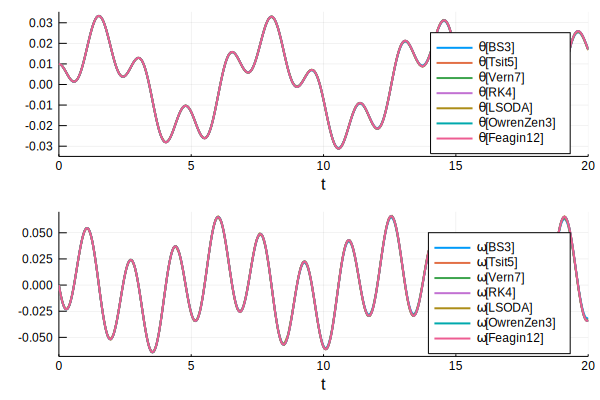

In [27]:
l = 1.0                             # length [m]
m = 1.0                             # mass[m]
g = 9.81                            # gravitational acceleration [m/s²]

function pendulum!(du,u,p,t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -3g/(2l)*sin(u[1]) + 3/(m*l^2)*p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

θ₀ = 0.01                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0,20.0)                  # time interval

M = t->0.1sin(t)                    # external torque [Nm]

prob = ODEProblem(pendulum!,u₀,tspan,M)
sol1 = solve(prob, BS3())
sol2 = solve(prob, Tsit5())
sol3 = solve(prob, Vern7())
sol4 = solve(prob, RK4())
sol5 = solve(prob, lsoda())
sol6 = solve(prob, OwrenZen3())
sol7 = solve(prob, Feagin12())

plot(sol1, linewidth=2,xaxis="t",
    label=["\\theta [BS3]" "\\omega [BS3]"],layout=(2,1))
plot!(sol2, lw=2, label=["\\theta [Tsit5]" "\\omega [Tsit5]"])
plot!(sol3, lw=2, label=["\\theta [Vern7]" "\\omega [Vern7]"])
plot!(sol4, lw=2, label=["\\theta [RK4]" "\\omega [RK4]"])
plot!(sol5, lw=2, label=["\\theta [LSODA]" "\\omega [LSODA]"])
plot!(sol6, lw=2, label=["\\theta [OwrenZen3]" "\\omega [OwrenZen3]"])
plot!(sol7, lw=2, label=["\\theta [Feagin12]" "\\omega [Feagin12]"])